In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
df= pd.read_csv(r'C:\Users\Dell\Downloads\Machine-Learning-Projects-master\02.Loan_Status_Prediction\data\train1.csv')
df.head(10)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Yes
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,No
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Yes
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Yes
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Yes
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Yes
6,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Yes
7,LP001014,Male,Yes,3+,Graduate,No,3036,2504.0,158.0,360.0,0.0,Semiurban,No
8,LP001018,Male,Yes,2,Graduate,No,4006,1526.0,168.0,360.0,1.0,Urban,Yes
9,LP001020,Male,Yes,1,Graduate,No,12841,10968.0,349.0,360.0,1.0,Semiurban,No


In [8]:
df= df.replace({"Loan_Status":{"Yes":1, "No":0 }})
df = df.replace ({"Gender":{"Male":1,"Female":0}})
df= df.replace({"Married":{"Yes":1, "No":0 }})

#Replace the 3+ in dependents ande make the column numeric
df['Dependents'] = df['Dependents'].replace('3+', '3')
df['Dependents']=pd.to_numeric(df['Dependents'], errors='coerce')

#Count the quantity of values on the column

df= df.replace({"Self_Employed":{"Yes":1, "No":0 }})


#Education Encoding

df= df.replace({"Education":{"Graduate":1, "Not Graduate":0 }})

#Drop the Loan ID column
df = df.drop(columns=['Loan_ID'])

#Property Area Encoding

df['Property_Area'] = df['Property_Area'].map({'Rural': 0, 'Urban': 1, 'Semiurban': 2})

print(df)




     Gender  Married  Dependents  Education  Self_Employed  ApplicantIncome  \
0       1.0      0.0         0.0          1            0.0             5849   
1       1.0      1.0         1.0          1            0.0             4583   
2       1.0      1.0         0.0          1            1.0             3000   
3       1.0      1.0         0.0          0            0.0             2583   
4       1.0      0.0         0.0          1            0.0             6000   
..      ...      ...         ...        ...            ...              ...   
609     0.0      0.0         0.0          1            0.0             2900   
610     1.0      1.0         3.0          1            0.0             4106   
611     1.0      1.0         1.0          1            0.0             8072   
612     1.0      1.0         2.0          1            0.0             7583   
613     0.0      0.0         0.0          1            1.0             4583   

     CoapplicantIncome  LoanAmount  Loan_Amount_Ter

In [9]:
df.fillna(df.median(), inplace=True)
columns = df.columns
for column in columns:
    df[column] = pd.to_numeric(df[column], errors='coerce')

In [10]:
col_names= df.columns.tolist()
for column in col_names:
  print("Valores Nulos en <{0}>: <{1}>".format(column,df[column].isnull().sum()))

Valores Nulos en <Gender>: <0>
Valores Nulos en <Married>: <0>
Valores Nulos en <Dependents>: <0>
Valores Nulos en <Education>: <0>
Valores Nulos en <Self_Employed>: <0>
Valores Nulos en <ApplicantIncome>: <0>
Valores Nulos en <CoapplicantIncome>: <0>
Valores Nulos en <LoanAmount>: <0>
Valores Nulos en <Loan_Amount_Term>: <0>
Valores Nulos en <Credit_History>: <0>
Valores Nulos en <Property_Area>: <0>
Valores Nulos en <Loan_Status>: <0>


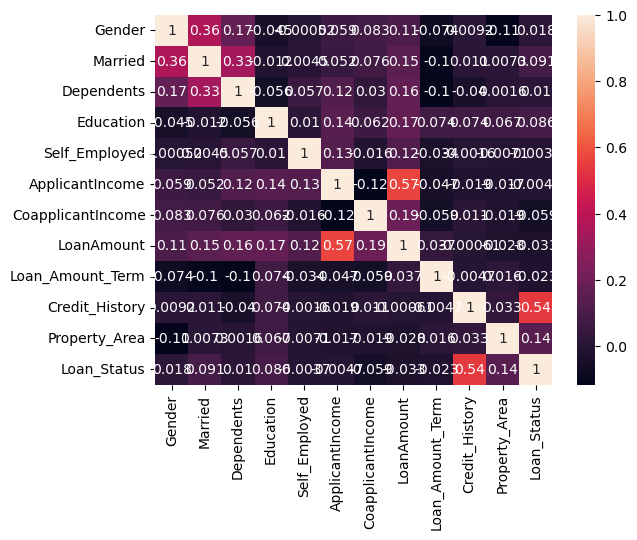

In [11]:
sns.heatmap(df.corr(),annot=True)
plt.show()

In [12]:
def correlationdrop(df, sl):
  columns = df.columns
  for column in columns:
      C=abs(df[column].corr(df['Loan_Status']))
      if C < sl:
        df=df.drop(columns=[column])
  return df

df= correlationdrop(df,0.05)

print(df)

     Married  Education  CoapplicantIncome  Credit_History  Property_Area  \
0        0.0          1                0.0             1.0              1   
1        1.0          1             1508.0             1.0              0   
2        1.0          1                0.0             1.0              1   
3        1.0          0             2358.0             1.0              1   
4        0.0          1                0.0             1.0              1   
..       ...        ...                ...             ...            ...   
609      0.0          1                0.0             1.0              0   
610      1.0          1                0.0             1.0              0   
611      1.0          1              240.0             1.0              1   
612      1.0          1                0.0             1.0              1   
613      0.0          1                0.0             0.0              2   

     Loan_Status  
0              1  
1              0  
2              1  

Text(0.5, 1.0, 'Loan Accepted by Property Area')

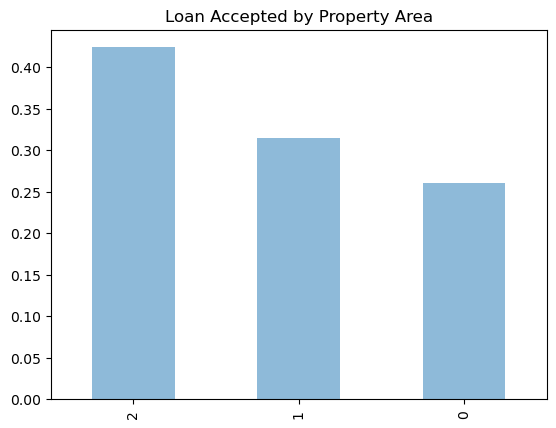

In [13]:
df.Property_Area[df.Loan_Status==1].value_counts(normalize = True).plot(kind='bar', alpha = 0.5)
plt.title('Loan Accepted by Property Area')
#plt.show()

Text(0.5, 1.0, 'Loan Accepted by Credit History')

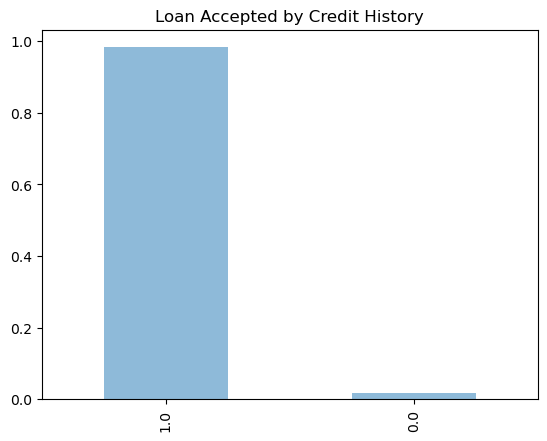

In [14]:
df.Credit_History[df.Loan_Status==1].value_counts(normalize = True).plot(kind='bar', alpha = 0.5)
plt.title('Loan Accepted by Credit History')
#plt.show()

Text(0.5, 1.0, 'Loan Accepted by Maritage State')

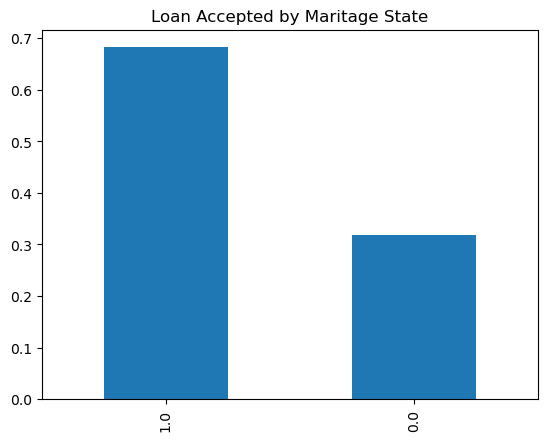

In [15]:
df.Married[df.Loan_Status==1].value_counts(normalize = True).plot(kind = 'bar')
plt.title('Loan Accepted by Maritage State')
#plt.show()

Text(0.5, 1.0, 'Loan accepted by Coaplicant Income')

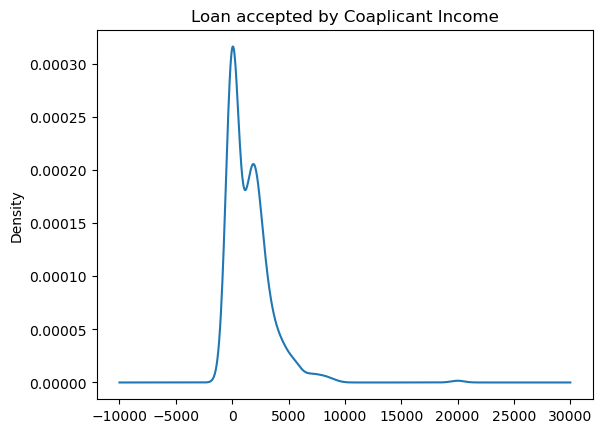

In [16]:
df.CoapplicantIncome[df.Loan_Status==1].plot(kind='kde')
plt.title('Loan accepted by Coaplicant Income')
#plt.show()

In [18]:
#Choose the dependent and independent columns


x = df.iloc[:,:-1].values
y = df.iloc[:,-1].values

In [19]:
#Scaling the data

from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()
X= sc.fit_transform(x)

In [20]:
#Split the data on the train and test datasets

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size= 0.2, random_state= 0)

In [21]:
from sklearn.svm import SVC
classifier = SVC(kernel = 'rbf', gamma= 0.2)
classifier.fit(X_train, y_train)

# Predicting the Test set results
y_pred = classifier.predict(X_test)

In [22]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

# Applying k-Fold Cross Validation
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = 10)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

[[14 19]
 [ 2 88]]
Accuracy: 80.44 %
Standard Deviation: 4.59 %
